# Visualization: Set Grids and Xticks

In this notebook, I show how to set **grids** and **xticks** easily.

## Table-of-Content

* [Load Dataset](#load-data)
* [Prepare Dataset](#prepare-dataset)
* [Plot Fare](#plot-fare)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

## Load Dataset <a class="anchor" id="load-data"></a>

Load **taxis dataset**.

In [2]:
# Load taxis dataset
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Prepare Dataset <a class="anchor" id="prepare-dataset"></a>

Select a **pickup zone** and **resample data** (i.e. Daily data - average fare).

In [3]:
# Calculate the daily average fare in the pickup zone Lenox Hill West 
pickup_zone_LHW = taxis[taxis["pickup_zone"] == "Lenox Hill West"]
pickup_zone_LHW.set_index("pickup", inplace=True)
pickup_zone_LHW = pickup_zone_LHW.resample("D")[["fare"]].mean().round(2)
pickup_zone_LHW.reset_index(inplace=True)
pickup_zone_LHW.head()

,pickup,fare
0,2019-03-01,5.86
1,2019-03-02,3.75
2,2019-03-03,NaN
3,2019-03-04,6.25
4,2019-03-05,11.75


## Plot Fare <a class="anchor" id="plot-fare"></a>

Set **horizontal lines** and **weekly** xticks.

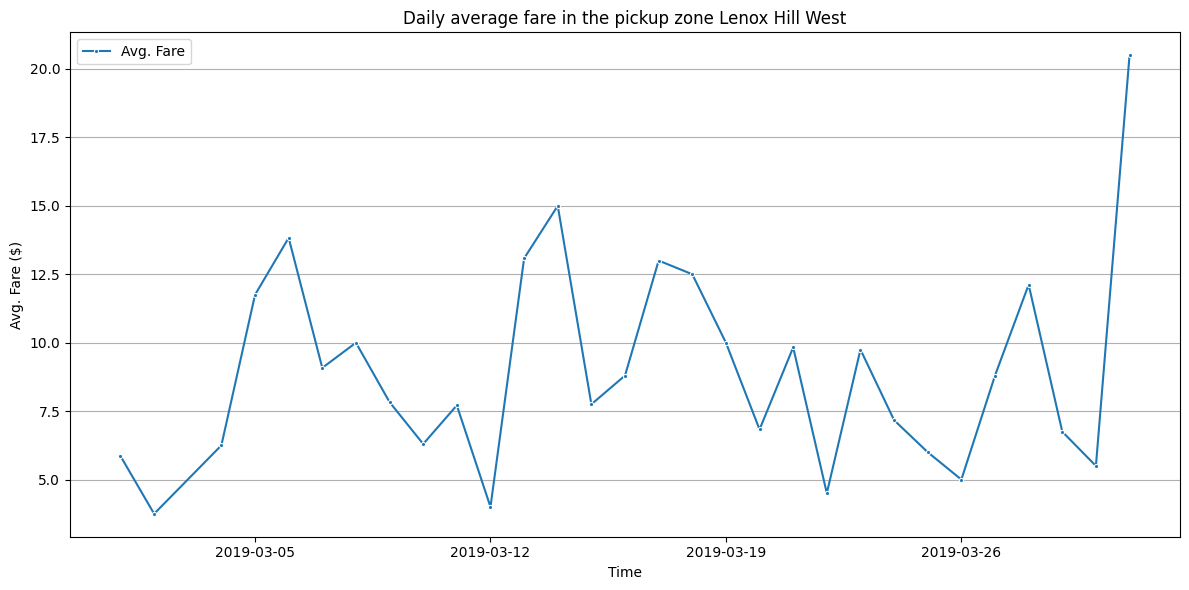

In [5]:
# Creat a figure with `figsize` parameter
plt.figure(figsize=(12,6))

# Plot analysis
ax = sns.lineplot(data=pickup_zone_LHW, 
                  x="pickup", y="fare", label="Avg. Fare", marker='.')
ax.set(title=("Daily average fare in the pickup zone Lenox Hill West"), 
       xlabel="Time", ylabel="Avg. Fare ($)", axisbelow=True)
ax.grid(axis="y") # It also can be: x or both

# Xticks
#-loc = plticker.MultipleLocator(base=7) 
weeks = mdates.WeekdayLocator() # Week or Year => mdates.YearLocator()
ax.xaxis.set_major_locator(weeks)

plt.tight_layout();

___